In [1]:
import pandas as pd

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову.

In [20]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


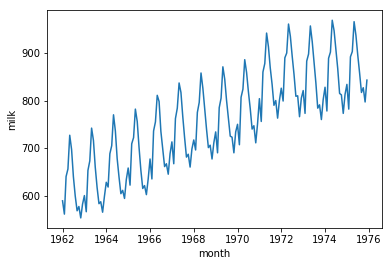

In [6]:
x = milk.milk.index
y = milk.milk.values

plt.plot(x, y)
plt.ylabel('milk')
plt.xlabel('month')

Примените к ряду из предыдущего вопроса критерий Дики-Фуллера.

In [7]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.milk)

/home/ivan/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-1.303811587422133,
 0.62742670860303007,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [21]:
daily_mean = []
for i in range(len(milk)):
    daily_mean.append(float(milk.milk.values[i])/milk.index.days_in_month[i])

In [22]:
sum(daily_mean)

4166.3266618994658

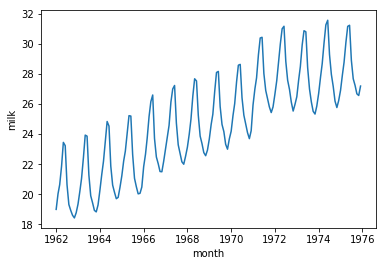

In [10]:
x = milk.milk.index
y = daily_mean

plt.plot(x, y)
plt.ylabel('milk')
plt.xlabel('month')

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так: milk.daily_diff1 = milk.daily - milk.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift: milk.daily_diff12 = milk.daily - milk.daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

In [23]:
milk['daily'] = daily_mean

In [25]:
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


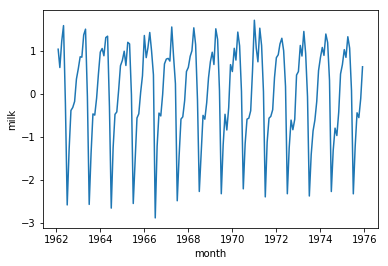

In [34]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)

x = milk.milk.index
y = milk.daily_diff1

plt.plot(x, y)
plt.ylabel('milk')
plt.xlabel('month')

Критерий Дики-Фуллера:

In [46]:
sm.tsa.stattools.adfuller(milk.daily_diff1[1:])

(-2.7594694762289058,
 0.064300546541747744,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.1539973381055688)

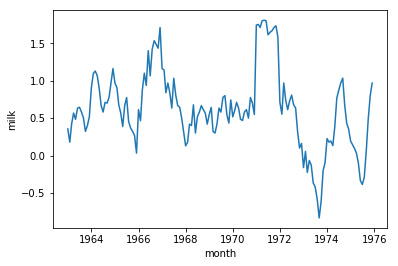

In [37]:
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)

x = milk.milk.index
y = milk.daily_diff12

plt.plot(x, y)
plt.ylabel('milk')
plt.xlabel('month')

In [51]:
sm.tsa.stattools.adfuller(milk.daily_diff12[12:])

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

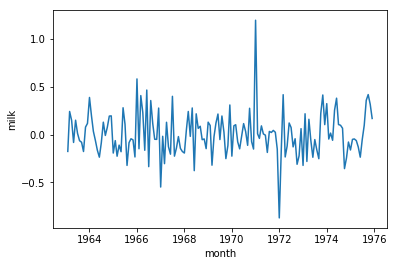

In [62]:
milk['daily_diff_12_1'] = milk.daily_diff12 - milk.daily_diff12.shift(1)

x = milk.milk.index
y = milk.daily_diff_12_1

plt.plot(x, y)
plt.ylabel('milk')
plt.xlabel('month')

In [67]:
sm.tsa.stattools.adfuller(milk.daily_diff_12_1[13:])

(-5.4813263347969254,
 2.2808455518037559e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.905137509892256)

In [68]:
milk.head()

,milk,daily,daily_diff1,daily_diff12,daily_diff_12_1
month,,,,,
1962-01-01,589,19.000000,NaN,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN,NaN
1962-03-01,640,20.645161,0.609447,NaN,NaN
1962-04-01,656,21.866667,1.221505,NaN,NaN
1962-05-01,727,23.451613,1.584946,NaN,NaN


Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так: 

import statsmodels.api as sm

sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

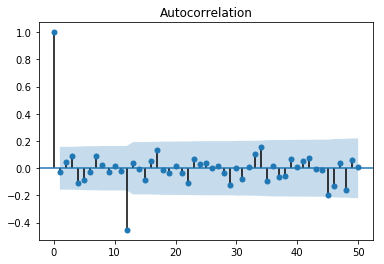

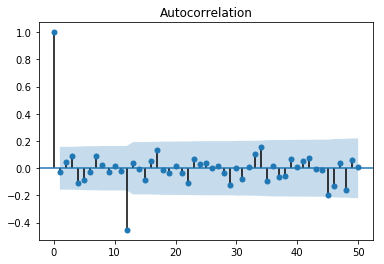

In [72]:
sm.graphics.tsa.plot_acf(milk.daily_diff_12_1[13:].values.squeeze(), lags=50)

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так: 

import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

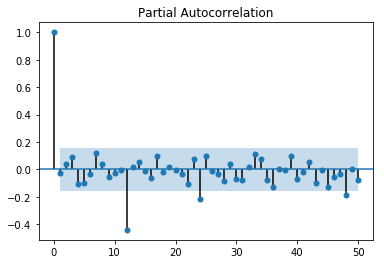

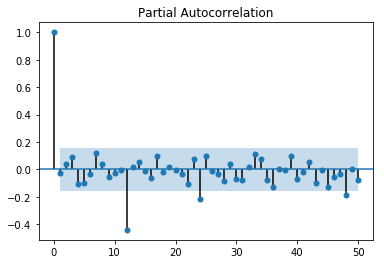

In [73]:
sm.graphics.tsa.plot_pacf(milk.daily_diff_12_1[13:].values.squeeze(), lags=50)